# Laliga Analysis

### Question 1


## Read the dataset using Pandas

Read the dataset with file name 'laliga.csv' (taken from [Wikipedia](https://en.wikipedia.org/wiki/La_Liga)) into a dataframe with name **laliga**. 

(Take care of Headers, see **skiprows** parameter in **read_csv**)


In [1]:
import numpy as np
import pandas as pd

In [2]:
laliga = pd.read_csv('Laliga.csv', skiprows = 0, header=1)

In [3]:
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


### Question 2

## Take care of Missing values in the dataset

Missing values are given as '-'. Replace all those missing values with 0.

In [4]:
laliga.replace('-',0, inplace=True)

### Question 3

## Exploring the Datset attributes

Find all the attributes(columns) in the dataset.

In [8]:
list(laliga)

['Pos',
 'Team',
 'Seasons',
 'Points',
 'GamesPlayed',
 'GamesWon',
 'GamesDrawn',
 'GamesLost',
 'GoalsFor',
 'GoalsAgainst',
 'Champion',
 'Runner-up',
 'Third',
 'Fourth',
 'Fifth',
 'Sixth',
 'T',
 'Debut',
 'Since/LastApp',
 'BestPosition']

### Question 4

## Checking the index of the dataframe and change it with desired attribute.

Change the default index of the laliga dataframe with **'Team'** attribute.

In [9]:
laliga.set_index('Team',inplace=True)



## Descriptive Stats

### Question 5

What is the Team that has got maximum championships and whats the maximum count? [consider the **Champions** column]

**Note:** Check the datatype of the column when you are operating on a column, by using **dtype** and change it to required using **astype**

In [10]:
laliga['Champion'].dtype

dtype('O')

In [11]:
# Team here
laliga['Champion'] = laliga.Champion.astype('int')
laliga['Champion'].idxmax()


'Real Madrid'

In [12]:
# max count here
laliga['Champion'].max()

33

### Question 6

Which Team has come more times under **sixth position** and how many times? (**include** sixth position also)

In [13]:
# Team here
cols = list(laliga.iloc[:,:-3])
laliga[cols] = laliga[cols].apply(pd.to_numeric) #change columns to numeric

laliga['tot'] = laliga.loc[:,'Champion':'Sixth'].sum(axis=1)
laliga['tot'].idxmax()

'Barcelona'

In [14]:
#how many time here
laliga['tot'].max()
#laliga.loc[laliga.index=='Barcelona','tot']

84

### Question 7

Lets define **Goal difference** as the difference between the **GoalsFor** and **GoalsAgainst**. And it can take negative values also.

Print all the goal differences for all the teams.

Write a function with name **goal_diff_count** which should return all the teams with their Goal Differences.

Write a function with name **max_goal_diff_team** which should return the team with max Goal Difference.

Write a function with name **min_goal_diff_team** which should return the team with min Goal Difference.



In [15]:
#max_goal_diff_team():
laliga['Goal_diff'] = laliga['GoalsFor'] - laliga['GoalsAgainst']

def max_goal_diff_team():
    return abs(laliga['Goal_diff']).idxmax() 

#above is based on assumption that we are looking for overall absolute difference. 
# below is the function without using absolute values:

#def max_goal_diff_team():
#    return laliga['Goal_diff'].idxmax() 
max_goal_diff_team()

'Real Madrid'

In [16]:
#min_goal_diff_team():

#ased on assumption that we are looking for overall absolute difference. 
def min_goal_diff_team():
    return abs(laliga['Goal_diff']).idxmin()

min_goal_diff_team()

'Girona'

In [17]:
#goal_diff_count():

def goal_diff_count():
    return laliga['Goal_diff']

goal_diff_count()

Team
Real Madrid            2807
Barcelona              2786
Atletico Madrid        1225
Valencia                929
Athletic Bilbao         931
Sevilla                 307
Espanyol               -280
Real Sociedad            -2
Zaragoza               -164
Real Betis             -333
Deportivo La Coruna    -136
Celta Vigo             -346
Valladolid             -413
Racing Santander       -525
Sporting Gijon         -399
Osasuna                -334
Malaga                 -342
Oviedo                 -309
Mallorca               -189
Las Palmas             -399
Villarreal              103
Granada                -338
Rayo Vallecano         -328
Elche                  -272
Getafe                 -113
Hercules               -334
Tenerife               -125
Murcia                 -385
Alaves                 -165
Levante                -202
                       ... 
Sabadell               -228
Cadiz                  -269
Logrones               -198
Castellon              -169
Albacete       

### Question 8

## Adding new attribute to the dataframe

Create a new column in the laliga dataframe with name **WinningPercent** which is percentage of winning. And fill all missing values with 0.

**Percentage of Winning = (GamesWon - GamesPlayed)*100 **


In [17]:
laliga['WinningPercent'] = laliga['GamesWon'] * 100/laliga['GamesPlayed']
laliga['WinningPercent'].fillna(0,inplace=True)
laliga['WinningPercent']

Team
Real Madrid            59.630702
Barcelona              57.241130
Atletico Madrid        47.475134
Valencia               44.557057
Athletic Bilbao        43.772629
Sevilla                41.112957
Espanyol               36.100533
Real Sociedad          37.532580
Zaragoza               35.146022
Real Betis             35.069444
Deportivo La Coruna    36.797386
Celta Vigo             34.511190
Valladolid             31.582538
Racing Santander       31.722689
Sporting Gijon         32.304527
Osasuna                32.321700
Malaga                 31.075697
Oviedo                 34.228188
Mallorca               33.704453
Las Palmas             33.485401
Villarreal             41.176471
Granada                29.380054
Rayo Vallecano         28.987730
Elche                  29.941003
Getafe                 32.236842
Hercules               29.299363
Tenerife               31.376518
Murcia                 24.744027
Alaves                 32.894737
Levante                28.109453
     

## Slicing a dataframe

### Question 9



Print all the columns from **Seasons** and **GoalsAgainst**.

In [18]:
laliga.loc[:,'Seasons':'GoalsAgainst']

,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst
Team,,,,,,,,
Real Madrid,86,4385,2762,1647,552,563,5947,3140
Barcelona,86,4262,2762,1581,573,608,5900,3114
Atletico Madrid,80,3442,2614,1241,598,775,4534,3309
Valencia,82,3386,2664,1187,616,861,4398,3469
Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700
Sevilla,73,2819,2408,990,531,887,3680,3373
Espanyol,82,2792,2626,948,608,1070,3609,3889
Real Sociedad,70,2573,2302,864,577,861,3228,3230
Zaragoza,58,2109,1986,698,522,766,2683,2847


### Question 10

Print all the teams which have started playing between **1930-1980**.

**Steps:**

Split the start year first.

Check the data type and change it to **int** if its not. 

Then do the operation on that.

In [19]:
laliga['start_yr'] = laliga['Debut'].str.split('-').str[0]


In [20]:
laliga['start_yr'].dtype

dtype('O')

In [21]:
laliga['start_yr'].astype('int')

Team
Real Madrid            1929
Barcelona              1929
Atletico Madrid        1929
Valencia               1931
Athletic Bilbao        1929
Sevilla                1934
Espanyol               1929
Real Sociedad          1929
Zaragoza               1939
Real Betis             1932
Deportivo La Coruna    1941
Celta Vigo             1939
Valladolid             1948
Racing Santander       1929
Sporting Gijon         1944
Osasuna                1935
Malaga                 1949
Oviedo                 1933
Mallorca               1960
Las Palmas             1951
Villarreal             1998
Granada                1941
Rayo Vallecano         1977
Elche                  1959
Getafe                 2004
Hercules               1935
Tenerife               1961
Murcia                 1940
Alaves                 1930
Levante                1963
                       ... 
Sabadell               1943
Cadiz                  1977
Logrones               1987
Castellon              1941
Albacete       

### Question 11

Print the rows with Team name **'Real Madrid'**, **Getafe** and **'Valencia'**.

In [22]:
laliga.loc[['Real Madrid','Getafe', 'Valencia']]

,Pos,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,...,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,tot,Goal_diff,WinningPercent,start_yr
Team,,,,,,,,,,,,,,,,,,,,,
Real Madrid,1,86,4385,2762,1647,552,563,5947,3140,33,...,3,4,79,1929,1929,1,79,2807,59.630702,1929
Getafe,25,12,553,456,147,112,197,520,633,0,...,0,1,1,2004-05,2015-16,6,1,-113,32.236842,2004
Valencia,4,82,3386,2664,1187,616,861,4398,3469,6,...,10,7,50,1931-32,1987-88,1,50,929,44.557057,1931


### Question 12

Print the columns with columns **'Points'**, **'GamesWon'** and **'WinningPercent'**.

In [23]:
laliga.loc[:,['Points', 'GamesWon', 'WinningPercent']]

,Points,GamesWon,WinningPercent
Team,,,
Real Madrid,4385,1647,59.630702
Barcelona,4262,1581,57.241130
Atletico Madrid,3442,1241,47.475134
Valencia,3386,1187,44.557057
Athletic Bilbao,3368,1209,43.772629
Sevilla,2819,990,41.112957
Espanyol,2792,948,36.100533
Real Sociedad,2573,864,37.532580
Zaragoza,2109,698,35.146022


### Question 13

**Double** the **Points** for all the **Teams** and save it in the dataframe as well.

In [25]:
laliga['DoublePoints'] = laliga['Points']*2
laliga.head()

,Pos,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,...,Sixth,T,Debut,Since/LastApp,BestPosition,tot,Goal_diff,WinningPercent,start_yr,DoublePoints
Team,,,,,,,,,,,,,,,,,,,,,
Real Madrid,1,86,4385,2762,1647,552,563,5947,3140,33,...,4,79,1929,1929,1,79,2807,59.630702,1929,8770
Barcelona,2,86,4262,2762,1581,573,608,5900,3114,25,...,6,83,1929,1929,1,84,2786,57.241130,1929,8524
Atletico Madrid,3,80,3442,2614,1241,598,775,4534,3309,10,...,6,56,1929,2002-03,1,56,1225,47.475134,1929,6884
Valencia,4,82,3386,2664,1187,616,861,4398,3469,6,...,7,50,1931-32,1987-88,1,50,929,44.557057,1931,6772
Athletic Bilbao,5,86,3368,2762,1209,633,920,4631,3700,8,...,10,49,1929,1929,1,48,931,43.772629,1929,6736


# Analysis of Donald Trump's Tweets 

### Question 1

## Read the dataset into a dataframe

Read the dataset **'trump_twitter.csv'** (taken from [FiveThirtyEight](https://data.fivethirtyeight.com/)) into a dataframe with name **trump_df** using pandas.

In [26]:
import pandas as pd
import numpy as np

In [190]:
trump_df = pd.read_csv('trump_twitter.csv', skiprows=0, header=0)

### Question 2

## Trump is really excited for running as President. 

Find the percentage of tweets with **atleast one '!'**.

In [189]:
round(sum(trump_df['text'].str.contains('!'))*100/len(trump_df),2)

52.01

### Question 3

## Number of Tweets Donald Trump posted per day

Plot the number of tweets per day trump posted.

Refer, if you are looking for Date splitting : http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html


In [183]:
trump_df['date'] = trump_df['created_at'].str.split(' ').str[0]
trump_df['date'] = pd.to_datetime(trump_df['date'])

In [ ]:
import matplotlib.pyplot as plt

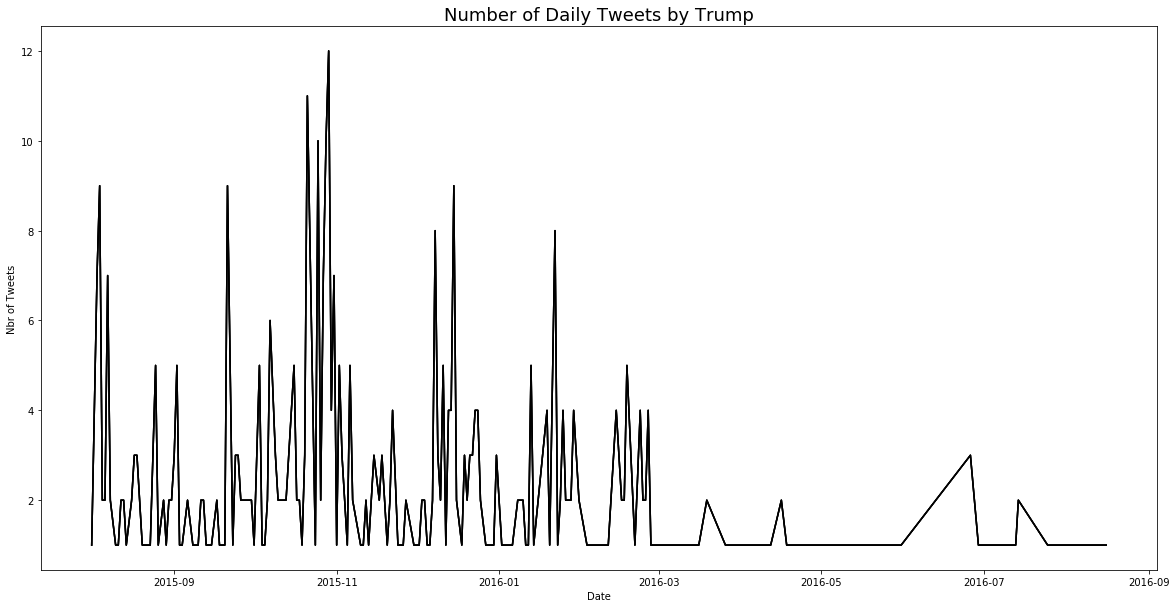

In [187]:
ntweet = trump_df.groupby('date').count()
plt.figure(figsize=(20,10))
plt.plot(ntweet, color = 'k')
plt.title('Number of Daily Tweets by Trump', size=18)
plt.xlabel('Date')
plt.ylabel('Nbr of Tweets')


plt.show()